<a href="https://colab.research.google.com/github/syamjithz/Fake_news_detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [ ]:
data_true=pd.read_csv("True.csv")
data_fake=pd.read_csv("Fake.csv")

In [ ]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_true.shape, data_fake.shape

((21417, 4), (23481, 4))

### Adding column name "class" in both datasets

In [ ]:
data_true["class"]=1
data_fake["class"]=0

In [ ]:
data_fake.head(5)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### Taking last 10 values for manual testing from both Datasets

In [ ]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0, inplace=True)
    
data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
    data_fake.drop([i],axis=0, inplace=True)

### merging these two datasets in single dataframe

In [ ]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv")

### Merging main two datasets

In [ ]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


### Performing some basic data visualizations

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


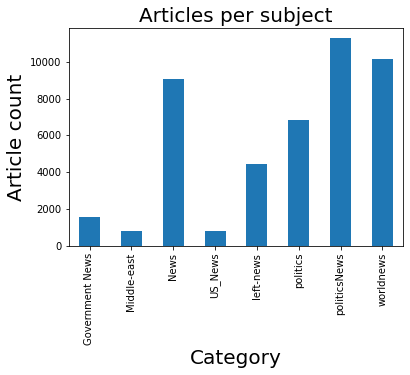

In [ ]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0 = Fake news
1 = True news


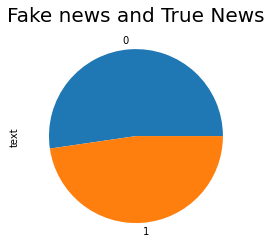

In [ ]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

### Removing 3 columns from dataset

In [ ]:
data = data_merge.drop(["title","subject","date"], axis=1)
data.head(10) 

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


### Shuffling the dataset for better prediction

In [ ]:
data=data.sample(frac=1)
data.head(10)

,text,class
18609,Got News- New York Times Mexican telecom mogu...,0
19888,BERLIN (Reuters) - Germany will have no choice...,1
761,Trumpers are rejoicing over the escalating act...,0
10182,Great news! Southern Methodist University in T...,0
11964,JOHANNESBURG (Reuters) - The nearly man of Sou...,1
11924,BERLIN (Reuters) - German federal prosecutors ...,1
17045,I ll bet most Americans have no idea that we r...,0
1174,(Reuters) - U.S. President Donald Trump has in...,1
14098,SATURDAY NGHT LIVE S COLD OPEN last night brou...,0
6166,After an anti-LGBT witness demonstrated her ig...,0


### Checking for null values in dataset

In [ ]:
data.isnull().sum()

text     0
class    0
dtype: int64

### Creating data filtering function to remove unwanted data from text

In [ ]:
def filtering(data):
    text=data.lower()
    text=re.sub('[^a-zA-Z]',' ',text)
    return text

### Filtering data of our text column using above function

In [ ]:
data["text"]= data["text"].apply(filtering)
data.head(10)

,text,class
18609,got news new york times mexican telecom mogu...,0
19888,berlin reuters germany will have no choice...,1
761,trumpers are rejoicing over the escalating act...,0
10182,great news southern methodist university in t...,0
11964,johannesburg reuters the nearly man of sou...,1
11924,berlin reuters german federal prosecutors ...,1
17045,i ll bet most americans have no idea that we r...,0
1174,reuters u s president donald trump has in...,1
14098,saturday nght live s cold open last night brou...,0
6166,after an anti lgbt witness demonstrated her ig...,0


### Creating Dependant and independant variables

In [ ]:
X=data["text"]
y=data["class"]

### Spliting dataset for training and testing purpose

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### Vectorizing the text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vector = TfidfVectorizer()
xv_train=vector.fit_transform(X_train)
xv_test=vector.transform(X_test)

### Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [ ]:
DT.score(xv_test,y_test)

0.9961675579322639

In [ ]:
pred_DT = DT.predict(xv_test)

In [ ]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5820
           1       1.00      1.00      1.00      5400

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



[[5799   21]
 [  22 5378]]


<AxesSubplot:>

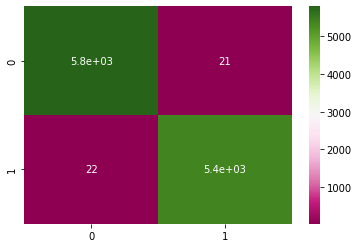

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,pred_DT)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="PiYG",annot=True)

## Manual Testing

In [ ]:
def result(n):
    if n == 0:
        return "FAKE News"
    elif n == 1:
        return "TRUE News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_test = pd.DataFrame(testing_news)
    new_test["text"] = new_test["text"].apply(filtering) 
    new_x_test = new_test["text"]
    new_xv_test = vector.transform(new_x_test)
    pred_DT = DT.predict(new_xv_test)

    return print("\n\nDT Prediction: {}".format(result(pred_DT[0])))

In [ ]:
news = str(input())
manual_testing(news)

Trump on Twitter (Dec 27) - Trump, Iraq, Syria


DT Prediction: FAKE News


In [ ]:
news = str(input())
manual_testing(news)

As U.S. budget fight looms, Republicans flip their fiscal script


DT Prediction: FAKE News
